# importing the pandas,seaborn,matplotlib and numpy 
#for the Exploratory Data Analysis

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#defining the data frames

haberman=pd.read_csv('haberman.csv')

In [6]:
# Number of rows(data-points) and columns(features).

print(haberman.shape)

(306, 4)


In [ ]:
#To view of the table  

haberman.head(5)
    

In [6]:
# To know the column names
 
    print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [7]:

# To know number of data-points for each class.

haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

# As it is not balanced dataset,
#it is imbalanced dataset because the number of data-points for both of the class are significantly different.
# we will see how to handle imbalanced data later


In [9]:
# To know statistical summary of data which is very important

haberman.describe()


,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


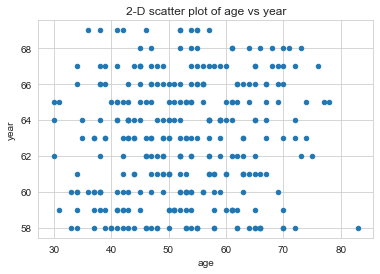

In [23]:
#2-d scatter plot

haberman.plot(kind='scatter', x='age', y='year') ;
plt.title("2-D scatter plot of age vs year");
plt.show()


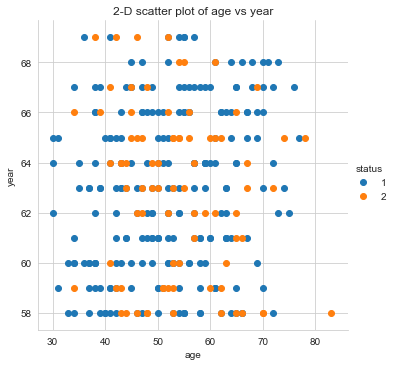

In [24]:
#2-d scatter coloured plot

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=5).map(plt.scatter, "age", "year") .add_legend();
plt.title("2-D scatter plot of age vs year");
plt.show();



#we can obser that there is too much of the overlapping of the staus 
#so we cannot determine the exact prediction

#pair plot


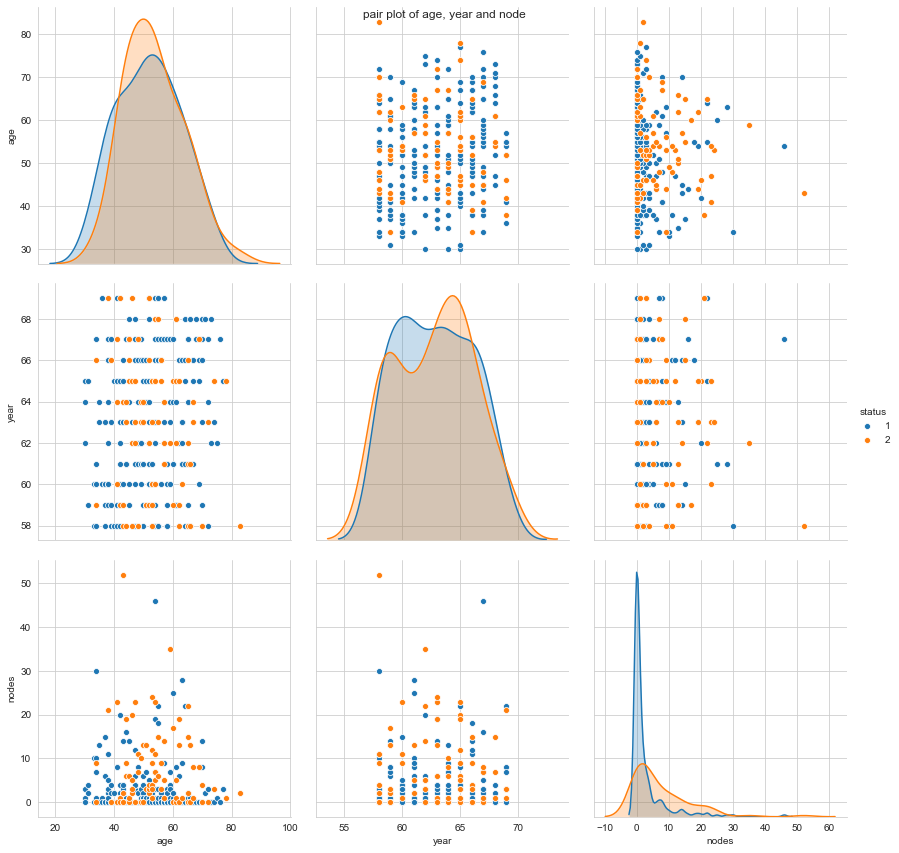

In [29]:
 sns.set_style("whitegrid")
sns.pairplot(haberman, hue = "status", vars = ["age", "year", "nodes"], size =4 )
plt.suptitle("pair plot of age, year and node")
plt.show()

##when we consider the pair plot the result is same as the 2-d scatter plot


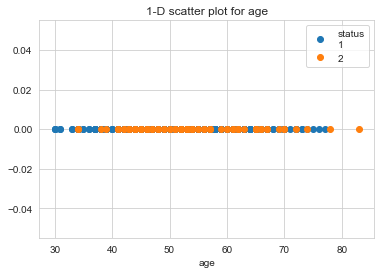

In [31]:
# 1-d scatter plot

one = haberman.loc[haberman["status"] == 1]
two = haberman.loc[haberman["status"] == 2]
plt.plot(one["age"], np.zeros_like(one["age"]), 'o', label = "status\n" "1")
plt.plot(two["age"], np.zeros_like(two["age"]), 'o', label = "2")
plt.title("1-D scatter plot for age")
plt.xlabel("age")
plt.legend()
plt.show()

##Observations

After looking at this plot we can easily count number of points that are there in age range who survived or not.

Many person died whose age was between 41-70.

#Histogram  and PDF 

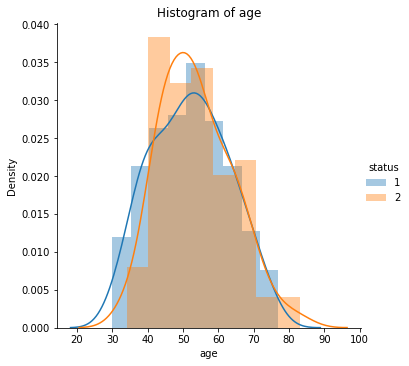

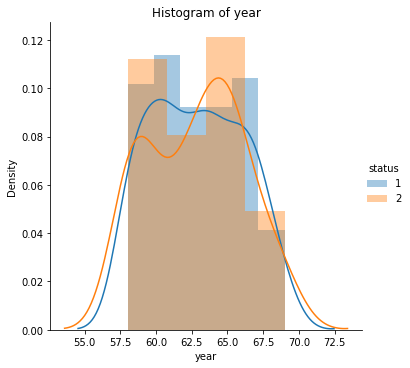

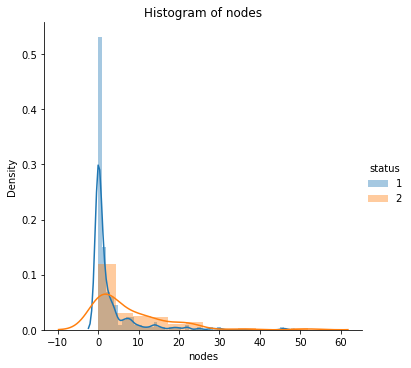

In [11]:
#histogram and pdf of AGES

sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.ylabel("Density")
plt.title("Histogram of age")
 
    
    #histogram and pdf of YEARS

    
sns.FacetGrid(haberman, hue = "status", height = 5). map(sns.distplot, "year").add_legend()
plt.title("Histogram of year")
plt.ylabel("Density")
plt.show()


#histogram and pdf of nodes
sns.FacetGrid(haberman, hue = "status", height = 5). map(sns.distplot, "nodes").add_legend();
plt.title("Histogram of nodes")
plt.ylabel("Density")
plt.show()



#Observations

-In all the plots the features are overlapping each other massively. But somehow we can say
-Probabily 58% people survived who had 0-5 axlillary_lymph_node and 12% died as well.

#pdf and cfd comparison's

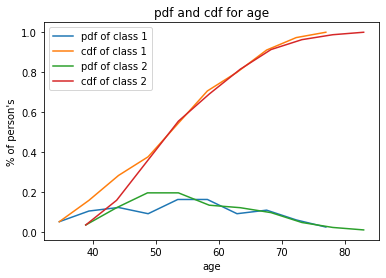

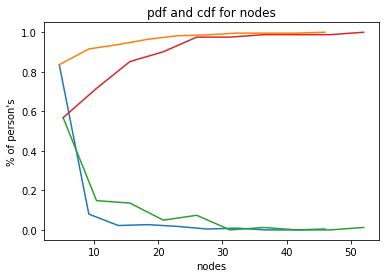

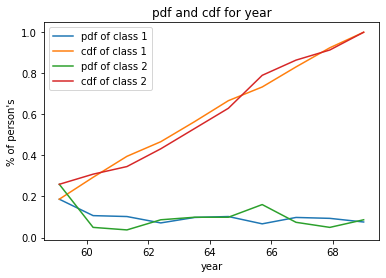

In [14]:
one = haberman.loc[haberman["status"] == 1]
two = haberman.loc[haberman["status"] == 2]

#PDF and CFD comparison on ages

label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
counts, bin_edges = np.histogram(one["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for age")
plt.xlabel("age")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)
plt.show();


##pdf and cfd comparison on nodes

label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
counts, bin_edges = np.histogram(one["nodes"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two["nodes"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for nodes")
plt.xlabel("nodes")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show();
##pdf and cfd comparison on year



label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
counts, bin_edges = np.histogram(one["year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)



counts, bin_edges = np.histogram(two["year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for year")
plt.xlabel("year")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)
plt.show();

#Observations

-15% of the person's have less than or equal to age 37 who survived.
-perosons' who has more than 46 auxillary_lymph_node not survived.

#Observations

-15% of the person's have less than or equal to age 37 who survived.
-Perosons' who has more than 46 auxillary_lymph_node not survived.

#Box plot and Whiskers

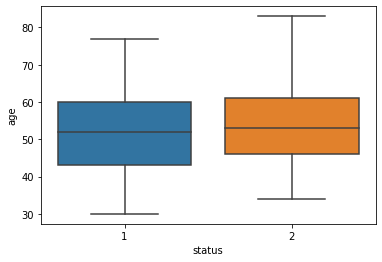

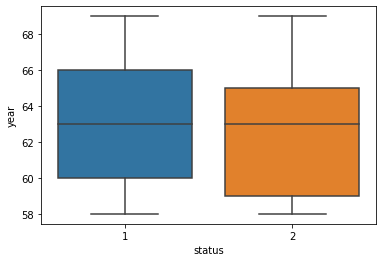

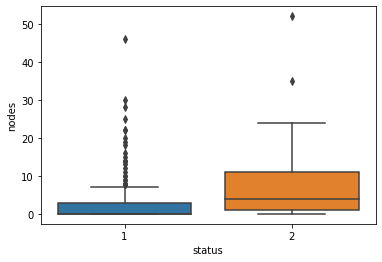

In [15]:

sns.boxplot(x='status',y='age', data=haberman)
plt.show()

sns.boxplot(x='status',y='year', data=haberman)

plt.show()

sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()


#Observation
-The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959 have the slighlty lower chance to surive that the rest.

# Violin plots

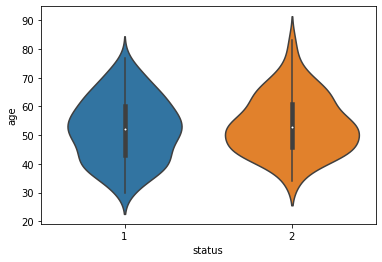

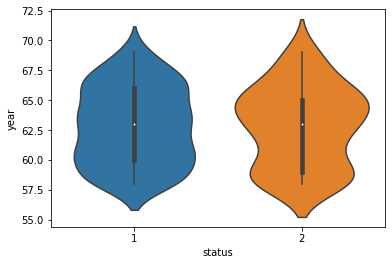

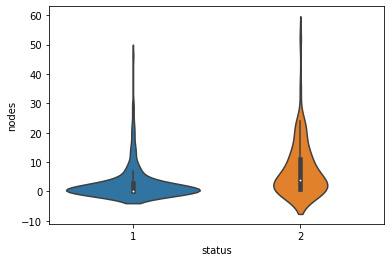

In [16]:
#violin plot for AGES

sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.show()


#Violin plot for YEARS

sns.violinplot(x="status", y="year", data=haberman, size=8)
plt.show()

#Violin plot for NODES

sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.show()


#Observation
-The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959 have the slighlty lower chance to surive that the rest.


#2D Density plot, contors-plot

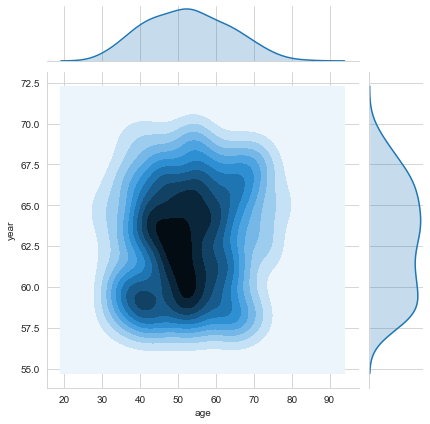

In [71]:

sns.jointplot(x="age", y="year", data=haberman, kind="kde");
plt.show();


# RESULT

#Observation
""""
As we are unable to classify which is the most useful feature because of too much overlapping.
But, Somehow we can say, In operation_year, 60-65 more person died who has less than 6 node.
And hence, this plot is not much informative in this case."""

#Conclusion

"""The given dataset is imbalenced as it does not contains euqal number of data-points for each class.
The given dataset is not linearly seprable form each class.
There are too much overlapping in the data-points and hence it is very diffucult to classify.
somehow node is giving some intution in the dataset.
we can not build simple model using only,
if else condition we need to have some more complex technique to handle this dataset."""